In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
from random import seed
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import string
import random


Function to add padding

In [17]:
def add_margin(pil_img, top, right, bottom, left):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height),(255,255,255))
    result.paste(pil_img, (left, top))
    return result

Letters dictionary

In [18]:
letters_dict = {
  "ا": 1,
  "ب": 2,
  "ت": 3,
  "ث": 4,
  "ج": 5,
  "ح": 6,
  "خ": 7,
  "د": 8,
  "ذ": 9,
  "ر": 10,
  "ز": 11,
  "س": 12,
  "ش": 13,
  "ص": 14,
  "ض": 15,
  "ط": 16,
  "ظ": 17,
  "ع": 18,
  "غ": 19,
  "ف": 20,
  "ق": 21,
  "ك": 22,
  "ل": 23,
  "لا": 24,
  "م": 25,
  "ن": 26,
  "ه": 27,
  "و": 28,
  "ي": 29,
  "ء": 30  

}

In [19]:
letters_dict.keys()

dict_keys(['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'لا', 'م', 'ن', 'ه', 'و', 'ي', 'ء'])

Create panda datadrame and dictionary to store image info

In [20]:
image_info = pd.DataFrame()

In [21]:
image_info2 = pd.DataFrame()

In [22]:
data = {'label':[],'image':[],'height':[], 'width':[],'centerx':[],'centery':[]}

In [23]:
data2 = {'label':[],'image':[],'height':[], 'width':[],'centerx':[],'centery':[]}

In [24]:
data_img = {'filename':[],'width':[],'height':[],'label':[],'xmin':[],'ymin':[],'xmax':[],'ymax':[],'source':[],'numpy':[]}

In [25]:
data_img2 = {'filename':[],'width':[],'height':[],'label':[],'xmin':[],'ymin':[],'xmax':[],'ymax':[],'source':[]}

Append to dictionary and dataframe

In [26]:
def genrateXY(w,h):
    n=100
    if((n-w == 0) or (n-h == 0)):
        x,y = 0,0
    else:
        x = randint(0, n-w)
        y = randint(0, n-h)
    top=y
    left=x
    right=n-(x+w)
    bottom=n-(y+h)
    return top,left,right,bottom

In [36]:
for i in os.listdir('LettersObjectDetection'):
    print(i)    
    for j in os.listdir("LettersObjectDetection/"+i):
        #im = cv2.imread("test/"+i)
        im = Image.open("LettersObjectDetection/"+i+'/'+j)   
        orig_width = im.size[0]
        orig_height = im.size[1]
        top,left,right,bottom = genrateXY(orig_width,orig_height)
        
        try:
            im_new = add_margin(im, top, right, bottom, left)
            im_new.save("letters2/"+i+'/'+j, quality=95)
            data = asarray(im_new)
            data_img['filename'].append(j)
            data_img['width'].append(im.size[0])
            data_img['height'].append(im.size[1])
            data_img['label'].append(i)
            data_img['xmin'].append(left)
            data_img['ymin'].append( top)
            data_img['xmax'].append(left + orig_width)
            data_img['ymax'].append(top + orig_height)
            data_img['source'].append("letters2/"+i+'/'+j)
            data_img['numpy'].append(data)
        except:
            continue



        

alef
ba
daad
daal
een
faa
geem
gheen
h
haa
hamza
kaaf
khaa
la
laam
meem
noon
qaaf
raa
saad
seen
sheen
taa
thaa
ttaa
wow
yaa
zaal
zeen
zhaaa2


In [37]:
image_info = image_info.from_dict(data_img)


In [40]:
image_info

,filename,width,height,label,xmin,ymin,xmax,ymax,source,numpy
0,1.png,6,22,ا,61,53,67,75,letters2/alef/1.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,10.png,4,22,ا,21,59,25,81,letters2/alef/10.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,100.png,4,22,ا,17,68,21,90,letters2/alef/100.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,1000.png,4,22,ا,80,45,84,67,letters2/alef/1000.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,1001.png,4,22,ا,26,23,30,45,letters2/alef/1001.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...
157003,995.png,13,22,ظ,57,68,70,90,letters2/zhaaa2/995.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157004,996.png,11,22,ظ,49,2,60,24,letters2/zhaaa2/996.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157005,997.png,13,22,ظ,29,51,42,73,letters2/zhaaa2/997.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157006,998.png,12,22,ظ,50,57,62,79,letters2/zhaaa2/998.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [51]:
image_info = image_info.from_dict(data_img)


In [41]:
training_data = pd.DataFrame()

In [42]:
training_data = image_info[['xmin','xmax','ymin','ymax','label','numpy']].copy()

In [45]:
training_data

,xmin,xmax,ymin,ymax,label,numpy
0,61,67,53,75,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,21,25,59,81,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,17,21,68,90,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,80,84,45,67,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,26,30,23,45,1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...
157003,57,70,68,90,17,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157004,49,60,2,24,17,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157005,29,42,51,73,17,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
157006,50,62,57,79,17,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [44]:
training_data['label'] = training_data['label'].map(letters_dict)

In [61]:
training_data.to_csv("Image_Info_No.csv",encoding='utf-8-sig',header=False,index = False)

In [39]:
image_info.loc[image_info['label'] == 'alef', 'label'] = 'ا'
image_info.loc[image_info['label'] == "ba", 'label'] = 'ب'
image_info.loc[image_info['label'] == "daad", 'label'] = 'ض'
image_info.loc[image_info['label'] == "daal", 'label'] = 'د'
image_info.loc[image_info['label'] == "een", 'label'] = 'ع'
image_info.loc[image_info['label'] == "faa", 'label'] = 'ف'
image_info.loc[image_info['label'] == "geem", 'label'] = 'ج'
image_info.loc[image_info['label'] == "gheen", 'label'] = 'غ'
image_info.loc[image_info['label'] == "h", 'label'] = 'ه'
image_info.loc[image_info['label'] == "haa", 'label'] = 'ح'
image_info.loc[image_info['label'] == "hamza", 'label'] = 'ء'
image_info.loc[image_info['label'] == "kaaf", 'label'] = 'ك'
image_info.loc[image_info['label'] == "khaa", 'label'] = 'خ'
image_info.loc[image_info['label'] == "la", 'label'] = 'لا'
image_info.loc[image_info['label'] == "laam", 'label'] = 'ل'
image_info.loc[image_info['label'] == "meem", 'label'] = 'م'
image_info.loc[image_info['label'] == "noon", 'label'] = 'ن'
image_info.loc[image_info['label'] == "qaaf", 'label'] = 'ق'
image_info.loc[image_info['label'] == "raa", 'label'] = 'ر'
image_info.loc[image_info['label'] == "saad", 'label'] = 'ص'
image_info.loc[image_info['label'] == "seen", 'label'] = 'س'
image_info.loc[image_info['label'] == "sheen", 'label'] = 'ش'
image_info.loc[image_info['label'] == "taa", 'label'] = 'ت'
image_info.loc[image_info['label'] == "thaa", 'label'] = 'ث'
image_info.loc[image_info['label'] == "ttaa", 'label'] = 'ط'
image_info.loc[image_info['label'] == "wow", 'label'] = 'و'
image_info.loc[image_info['label'] == "yaa", 'label'] = 'ي'
image_info.loc[image_info['label'] == "zaal", 'label'] = 'ذ'
image_info.loc[image_info['label'] == "zeen", 'label'] = 'ز'
image_info.loc[image_info['label'] == "zhaaa2", 'label'] = 'ظ'



In [32]:
size = []
for i in os.listdir('test2'):

    im = Image.open("test2/"+i)
    #size.append(im.size)
    top,left,right,bottom = genrateXY(im.size[0],im.size[1])
    im_new = add_margin(im, top, right, bottom, left)
    im_new.save("test3/"+i, quality=95)

16 22
16 23
16 23
16 21
16 22
15 22
14 22
16 22


Convert padded images to a numpy array

In [33]:
from numpy import asarray
# load the image
# for i in os.listdir("letters2"):
#     for j in os.listdir('letters2/' + i):
#         image = Image.open('letters2/' + i + '/' + j)
#         # convert image to numpy array
#         data = asarray(image)
#         newname = j.split('.png')[0]
#         np.save('Image_Numpy/' + i + '/' + newname,data)

In [35]:
testing = {'filename':[],'numpy':[]}

In [36]:
x = np.load('Image_Numpy/alef/1.npy')

In [38]:
testpd = pd.DataFrame()

In [37]:
testing['filename'].append('test')
testing['numpy'].append(x)

In [39]:
testpd = testpd.from_dict(testing)


In [40]:
testpd

,filename,numpy
0,test,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [30]:
label_map = {i:index for index,i in enumerate(os.listdir("Image_Numpy"))}


Split to training and testing

In [69]:
from sklearn.model_selection import train_test_split

train_images, test_images = train_test_split(training_data, test_size=0.2)

In [73]:
training_data_numpy = train_images.to_numpy()
testing_data_numpy = test_images.to_numpy()

In [46]:
train_data = training_data.to_numpy()

In [74]:
training_data_numpy

array([[18, 29, 16, 38, 22, array([[[255, 255, 255],
                                    [255, 255, 255],
                                    [255, 255, 255],
                                    ...,
                                    [255, 255, 255],
                                    [255, 255, 255],
                                    [255, 255, 255]],

                                   [[255, 255, 255],
                                    [255, 255, 255],
                                    [255, 255, 255],
                                    ...,
                                    [255, 255, 255],
                                    [255, 255, 255],
                                    [255, 255, 255]],

                                   [[255, 255, 255],
                                    [255, 255, 255],
                                    [255, 255, 255],
                                    ...,
                                    [255, 255, 255],
                         

In [92]:
train.to_csv('train.csv',encoding='utf-8-sig',index = False, header=False)
test.to_csv('test.csv',encoding='utf-8-sig',index = False,header=False)

Draw letter for testing

In [55]:
import matplotlib.patches as patches
from PIL import Image
def draw_img_boundry(row):
    im=row['numpy']
    xmin=row['xmin']
    ymin=row['ymin']
    xmax=row['xmax']
    ymax=row['ymax']
    #im = np.load(path)
    #im = Image.open(path)
    w=xmax-xmin
    h=ymax-ymin
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)
    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

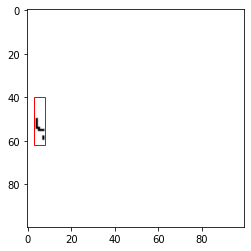

In [60]:
draw_img_boundry(training_data.iloc[139650])

Convert all images to black and white

In [7]:
for i in os.listdir("LettersObjectDetection"):
    for j in os.listdir("LettersObjectDetection/" + i):
        img = cv2.imread("LettersObjectDetection/"+i + '/' + j)
        number_of_white_pix = np.sum(img == 255)
        number_of_black_pix = np.sum(img == 0)
        # print(number_of_black_pix,number_of_white_pix)
        # print(r"LettersObjectDetection/"+i + '/' + j)
        if(number_of_black_pix>number_of_white_pix):
            blackAndWhiteImage = cv2.bitwise_not(img)
            cv2.imwrite("LettersObjectDetection/"+i + '/' + j,blackAndWhiteImage)
        # else:
        #     cv2.imwrite("LettersObjectDetection/"+i + '/' + j,img)

In [ ]:
from numpy.random import RandomState
import pandas as pd

df = pd.read_csv("testNew.csv")
rng = RandomState()

train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

train.DataFrame.to_csv("train_labels.csv")
test.DataFrame.to_csv("test_labels.csv")

In [86]:
train

,filename,width,height,label,xmin,ymin,xmax,ymax,source
85516,1491.png,9,22,م,5,1,14,23,letters2/meem/1491.png
37267,1651.png,12,22,ج,6,35,18,57,letters2/geem/1651.png
147818,1699.png,6,22,ز,18,34,24,56,letters2/zeen/1699.png
24188,883.png,7,22,د,35,24,42,46,letters2/daal/883.png
78873,77.png,8,22,لا,4,17,12,39,letters2/la/77.png
...,...,...,...,...,...,...,...,...,...
128366,3997.png,17,22,ث,17,28,34,50,letters2/thaa/3997.png
28720,80297.png,32,32,ع,31,32,63,64,letters2/een/80297.png
114518,2797.png,13,22,س,30,32,43,54,letters2/seen/2797.png
5151,81154.png,32,32,ا,3,32,35,64,letters2/alef/81154.png


In [ ]:
pd.read_csv('train2.csv',encoding='utf-8-sig')

In [5]:
import cv2
 
img = cv2.imread('letters2/alef/3.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
cv2.imwrite('image.png',resized)
print('Resized Dimensions : ',resized.shape)
 
# cv2.imshow("Resized image", resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Original Dimensions :  (68, 22, 3)
Resized Dimensions :  (64, 64, 3)


In [78]:
np.save('E:/training_data_numpy',training_data_numpy)
np.save('E:/testing_data_numpy',testing_data_numpy)

In [47]:
np.save('E:/train_data_numpy',train_data)
